In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
import tqdm

In [2]:
def get_data():
    file = open('./data/shashlik_61_pulses.txt', 'r')
    data = file.readlines()
    data = np.array([list(map(float, experiment.split())) for experiment in data])
   
    X = data[:, 2:]
    y_baseline = data[:, 1]
    y = data[:, 0]
    
    return X, y

In [3]:
X, y = get_data()

In [4]:
X[0]

array([2683.  , 2683.  , 2675.09, ..., 2694.95, 2691.95, 2686.98])

In [100]:
def generate_multi_signal(tau, alpha):
    first_signal = X[np.random.choice(X.shape[0], 1, replace=False)][0]  
    second_signal = X[np.random.choice(X.shape[0], 1, replace=False)][0]
    
    print(first_signal.shape)
    print(second_signal.shape)
    
    first_signal = np.concatenate([first_signal, [first_signal[0]]*tau])
    second_signal = np.concatenate([[second_signal[0]]*tau, second_signal])
    
    first_signal -= np.max(first_signal)
    second_signal -= np.max(second_signal)
    
    plt.plot(first_signal)
    plt.plot(second_signal)
    plt.plot(first_signal/alpha + second_signal)
    plt.legend(['First signal', 'Second signal', 'Sum of signals'])
    plt.show()

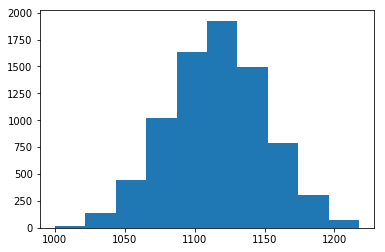

In [98]:
plt.hist(np.min(X, axis=1))
plt.show()

(1024,)
(1024,)


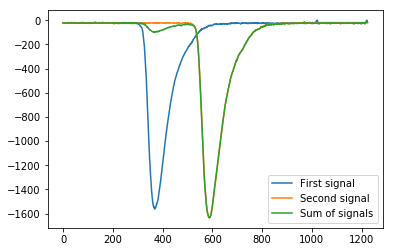

In [101]:
generate_multi_signal(200, 21)

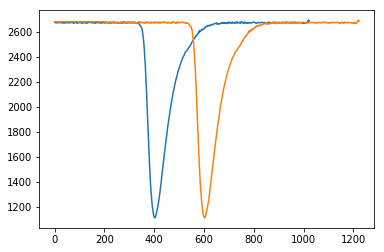

In [7]:
plt.plot(X[0])
plt.plot(np.concatenate([[X[0][0]]*200, X[0]]))